In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Get the csv  data nd print head
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#print summary
print('shape      >',df.shape)
print('Each column and data type and itsa count','\n')
df.info()

shape      > (7043, 21)
Each column and data type and itsa count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043

.Total 7043 rows and  21 columns. 
.SeniorCitizen,tenure are int and MonthlyCharges are float. Rest all the column are object datatype.               

So, first we have to  encode these columns as model only accecpt Numeric type data.             

In [9]:
#Drop customerID as it is not beneficial for creating model
df=df.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


.We have to encode gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contact,PaperlessBilling,PaymentMethod.     To proceed further by using OrdinalEncoder. 

In [10]:
#Importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [11]:
#Encoding gender
ord_encoder=OrdinalEncoder(categories=[['Male','Female']])
df1=ord_encoder.fit_transform(df[['gender']])
df1

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [12]:
#Encoding Partner
ord_encoder=OrdinalEncoder(categories=[['No','Yes']])
df2=ord_encoder.fit_transform(df[['Partner']])
df2

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [13]:
#Encoding Dependents
ord_encoder=OrdinalEncoder(categories=[['No','Yes']])
df3=ord_encoder.fit_transform(df[['Dependents']])
df3

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [14]:
#Encoding PhoneService
ord_encoder=OrdinalEncoder(categories=[['No','Yes']])
df4=ord_encoder.fit_transform(df[['PhoneService']])
df4

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [15]:
#Encoding MultipleLines
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No phone service']])
df5=ord_encoder.fit_transform(df[['MultipleLines']])
df5

array([[2.],
       [0.],
       [0.],
       ...,
       [2.],
       [1.],
       [0.]])

In [17]:
#Encoding InternetService
ord_encoder=OrdinalEncoder(categories=[['DSL','Fiber optic','No']])
df6=ord_encoder.fit_transform(df[['InternetService']])
df6

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [19]:
#Encoding OnlineSecurity
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No internet service']])
df7=ord_encoder.fit_transform(df[['OnlineSecurity']])
df7

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [21]:
#Encoding OnlineBackup
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No internet service']])
df8=ord_encoder.fit_transform(df[['OnlineBackup']])
df8

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [23]:
#Encoding DeviceProtection
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No internet service']])
df9=ord_encoder.fit_transform(df[['DeviceProtection']])
df9

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [24]:
#Encoding TechSupport
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No internet service']])
df10=ord_encoder.fit_transform(df[['TechSupport']])
df10

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [25]:
#Encoding StreamingTV
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No internet service']])
df11=ord_encoder.fit_transform(df[['StreamingTV']])
df11

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [26]:
#Encoding StreamingMovies
ord_encoder=OrdinalEncoder(categories=[['No','Yes','No internet service']])
df12=ord_encoder.fit_transform(df[['StreamingMovies']])
df12

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [28]:
#Encoding Contract
ord_encoder=OrdinalEncoder(categories=[['Month-to-month','One year','Two year']])
df13=ord_encoder.fit_transform(df[['Contract']])
df13

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [2.]])

In [29]:
#Encoding PaperlessBilling
ord_encoder=OrdinalEncoder(categories=[['No','Yes']])
df14=ord_encoder.fit_transform(df[['PaperlessBilling']])
df14

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [31]:
#Encoding PaperlessBilling
ord_encoder=OrdinalEncoder(categories=[['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)']])
df15=ord_encoder.fit_transform(df[['PaymentMethod']])
df15

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [2.]])

In [32]:
#OverRiding encoded column in dataframe
df['gender']=df1
df['Partner']=df2
df['Dependents']=df3
df['PhoneService']=df4
df['MultipleLines']=df5
df['InternetService']=df6
df['OnlineSecurity']=df7
df['OnlineBackup']=df8
df['DeviceProtection']=df9
df['TechSupport']=df10
df['StreamingTV']=df11
df['StreamingMovies']=df12
df['Contract']=df13
df['PaperlessBilling']=df14
df['PaymentMethod']=df15
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0,1.0,0.0,1,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.85,29.85,No
1,0.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,56.95,1889.5,No
2,0.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,53.85,108.15,Yes
3,0.0,0,0.0,0.0,45,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,42.30,1840.75,No
4,1.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,84.80,1990.5,No
7039,1.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,103.20,7362.9,No
7040,1.0,0,1.0,1.0,11,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.60,346.45,No
7041,0.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,74.40,306.6,Yes


.Now all the req column is encoded . 

In [33]:
#DataFrame statistics
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,0.872923,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.737796,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000


.It seems problem in std as the diffrence is very less infact some std is more then mean.                    
.All the column have equaL number of count. That is 7043.              
.Their may be outliers present in the dataset.                        

In [34]:
#checking Imbalency
print('No churn(N)  =>',df.Churn.value_counts()[0])
print('churn(Y)  =>',df.Churn.value_counts()[1])

No churn(N)  => 5174
churn(Y)  => 1869


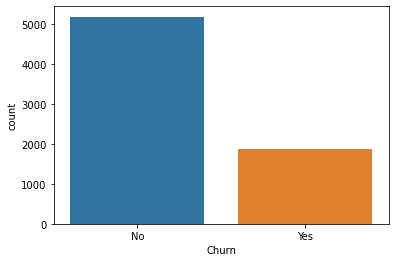

In [35]:
#plot each class frequency
sns.countplot(x='Churn',data=df)
plt.show()

In [36]:
#Using SelectKBest feature Selection Method
from sklearn.feature_selection import SelectKBest,f_classif

In [37]:
#Replace label column into binary codes
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})

In [49]:
x=df.drop(['Churn','TotalCharges'],axis=1)
y=df.Churn

In [50]:
best_features=SelectKBest(score_func=f_classif,k=15)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [52]:
#Concatanate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

print(feature_scores.nlargest(15,'score'))

        Feature_Name        score
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   877.074096
11       TechSupport   859.605791
9       OnlineBackup   653.598224
10  DeviceProtection   605.798058
16     PaymentMethod   522.432021
13   StreamingMovies   316.021505
12       StreamingTV   311.218184
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
7    InternetService    15.782320


In [53]:
#Model Building
new_x=df[['Contract','tenure','OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','PaymentMethod','StreamingMovies','StreamingTV','MonthlyCharges','PaperlessBilling','Dependents','SeniorCitizen','Partner','InternetService']]

In [54]:
new_x

,Contract,tenure,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaymentMethod,StreamingMovies,StreamingTV,MonthlyCharges,PaperlessBilling,Dependents,SeniorCitizen,Partner,InternetService
0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.85,1.0,0.0,0,1.0,0.0
1,1.0,34,1.0,0.0,0.0,1.0,1.0,0.0,0.0,56.95,0.0,0.0,0,0.0,0.0
2,0.0,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,53.85,1.0,0.0,0,0.0,0.0
3,1.0,45,1.0,1.0,0.0,1.0,2.0,0.0,0.0,42.30,0.0,0.0,0,0.0,0.0
4,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.70,1.0,0.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,24,1.0,1.0,0.0,1.0,1.0,1.0,1.0,84.80,1.0,1.0,0,1.0,0.0
7039,1.0,72,0.0,0.0,1.0,1.0,3.0,1.0,1.0,103.20,1.0,1.0,0,1.0,1.0
7040,0.0,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.60,1.0,1.0,0,1.0,0.0
7041,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74.40,1.0,0.0,1,1.0,1.0


In [55]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [57]:
#Building model to test unexpoed data 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=300)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [60]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1097,  175],
       [ 252,  237]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1272
           1       0.58      0.48      0.53       489

    accuracy                           0.76      1761
   macro avg       0.69      0.67      0.68      1761
weighted avg       0.75      0.76      0.75      1761



.This model fits 76% of data.
.Now checking that weather the model is overfitted or not.                     

In [63]:
#Importing cross value score
from sklearn.model_selection import cross_val_score

In [64]:
cross_val_score(knn,x_scaler,y,cv=5)

array([0.77004968, 0.77430802, 0.75372605, 0.77698864, 0.77130682])

In [65]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.7692758403767985

. As the model earlier value is same so Model is not overfitted.                    

In [66]:
#HyperParameter Tunning Using GridSearchCV
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'algorithm':['kd-tree','brute'],
           'leaf_size':[15,16,17,18],
           'n_neighbors':[3,4,5,6,7,8,9]
           }

In [68]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [69]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': [15, 16, 17, 18],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9]})

In [70]:
 gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 8}

In [71]:
#We will use thye best parameters in our knn algorithms and check weather it improve the accuracy
knn=KNeighborsClassifier(algorithm='brute', leaf_size= 15, n_neighbors= 8)

In [72]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=8)

In [74]:
y_pred=knn.predict(x_test)

In [75]:
cfm=confusion_matrix(y_test,y_pred)

In [76]:
cfm

array([[1145,  127],
       [ 287,  202]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1272
           1       0.61      0.41      0.49       489

    accuracy                           0.76      1761
   macro avg       0.71      0.66      0.67      1761
weighted avg       0.75      0.76      0.75      1761



.This is the best accuracy got from knn model.   

In [78]:
#Checking Outliers and removing using Z score
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(new_x))
print(z)

[[0.8282069  1.27744458 0.90358933 ... 0.43991649 1.03453023 1.18323364]
 [0.37127103 0.06632742 0.35138595 ... 0.43991649 0.96662231 1.18323364]
 [0.8282069  1.23672422 0.35138595 ... 0.43991649 0.96662231 1.18323364]
 ...
 [0.8282069  0.87024095 0.35138595 ... 0.43991649 1.03453023 1.18323364]
 [0.8282069  1.15528349 0.90358933 ... 2.27315869 1.03453023 0.17225018]
 [1.57074896 1.36937906 0.35138595 ... 0.43991649 0.96662231 0.17225018]]


In [82]:
print('Row numbers    \n',np.where(z > 3)[0])
print('columns number   \n',np.where(z > 3)[1])

Row numbers    
 []
columns number   
 []


In [83]:
index=(np.where(z>3)[0])
index

array([], dtype=int64)

.No outliers is present . So, we can proceed further.   
Now checking accuracy with ROC AUC curve to choose best model.                    

In [85]:
#plot ROC AUC for multiple models without hperparams tunning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [86]:
#Instiating all the model
lr=LogisticRegression()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

In [87]:
#training with all classifier
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("All model are trained")

All model are trained


In [88]:
#All models score captured
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)

print("all models test score captured")

all models test score captured


In [89]:
#Let's find ROC AUC score
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.6701513485357102

In [90]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7086106609561292

In [91]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.6735419801674576

In [92]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.6501138249025736

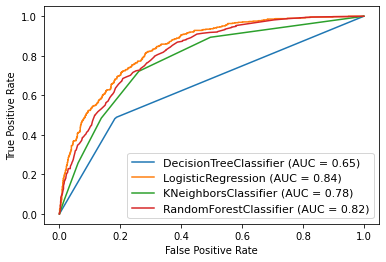

In [93]:
#Let's check ROC AUC  curve for the fitted model
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

.Hence LogisticRegression has max value then all other model .Hence LogisticRegression is good to use in this model.             

In [94]:
#saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(lr,f)